In [1]:
import pandas as pd

In [7]:
DF_CONCRETO = pd.read_csv('/content/concrete_data.csv')

In [8]:
DF_CONCRETO

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
DF_CONCRETO.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Tratamento das Variaveis


#### 1 - Eliminar registros menor que certa idade

In [10]:
def DELETE_OLD_RECORDS(DATAFRAME, AGE):
  return DATAFRAME.drop(DATAFRAME[DATAFRAME.age > AGE].index)

In [11]:
print('Formato antes: ', DF_CONCRETO.shape)
DF_CONCRETO = DELETE_OLD_RECORDS(DF_CONCRETO, 28) # Idade menor que 28
print('Formato depois: ', DF_CONCRETO.shape)

Formato antes:  (1030, 9)
Formato depois:  (749, 9)


#### 2 - Nova Coluna Agua/ Cimento (a/c)

In [12]:
WATER_INDEX = DF_CONCRETO.columns.get_loc("water")
CEMENT_INDEX = DF_CONCRETO.columns.get_loc("cement")

AC = [DF_CONCRETO.values[aux][WATER_INDEX] / DF_CONCRETO.values[aux][CEMENT_INDEX] for aux in range(DF_CONCRETO.shape[0])]

DF_CONCRETO.insert(WATER_INDEX, 'a/c', AC, False)
DF_CONCRETO = DF_CONCRETO.drop(columns='water')

In [13]:
DF_CONCRETO

,cement,blast_furnace_slag,fly_ash,a/c,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,0.300000,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,0.300000,2.5,1055.0,676.0,28,61.89
7,380.0,95.0,0.0,0.600000,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,0.857143,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,0.480000,0.0,932.0,594.0,28,39.29
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,0.649783,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,0.608318,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,1.297643,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,1.103708,11.3,989.6,788.9,28,32.77


#### 3 - Juntar Colunas Blast Furnace e Fly Ash em Addition

In [14]:
BF_INDEX = DF_CONCRETO.columns.get_loc("blast_furnace_slag")
FA_INDEX = DF_CONCRETO.columns.get_loc("fly_ash")

ADDITION = [DF_CONCRETO.values[aux][BF_INDEX] + DF_CONCRETO.values[aux][FA_INDEX] for aux in range(DF_CONCRETO.shape[0])]

DF_CONCRETO.insert(BF_INDEX, 'addition', ADDITION, False)
DF_CONCRETO = DF_CONCRETO.drop(columns=['blast_furnace_slag', 'fly_ash'])

In [15]:
DF_CONCRETO

,cement,addition,a/c,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.300000,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.300000,2.5,1055.0,676.0,28,61.89
7,380.0,95.0,0.600000,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.857143,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.480000,0.0,932.0,594.0,28,39.29
...,...,...,...,...,...,...,...,...
1025,276.4,206.3,0.649783,8.9,870.1,768.3,28,44.28
1026,322.2,115.6,0.608318,10.4,817.9,813.4,28,31.18
1027,148.5,248.0,1.297643,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,1.103708,11.3,989.6,788.9,28,32.77


#### 3 - Eliminar suplesplast

In [16]:
DF_CONCRETO = DF_CONCRETO.drop(columns='superplasticizer')
DF_CONCRETO

,cement,addition,a/c,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.300000,1040.0,676.0,28,79.99
1,540.0,0.0,0.300000,1055.0,676.0,28,61.89
7,380.0,95.0,0.600000,932.0,594.0,28,36.45
8,266.0,114.0,0.857143,932.0,670.0,28,45.85
9,475.0,0.0,0.480000,932.0,594.0,28,39.29
...,...,...,...,...,...,...,...
1025,276.4,206.3,0.649783,870.1,768.3,28,44.28
1026,322.2,115.6,0.608318,817.9,813.4,28,31.18
1027,148.5,248.0,1.297643,892.4,780.0,28,23.70
1028,159.1,186.7,1.103708,989.6,788.9,28,32.77


#### 4 - Separe Dataset em entrada e Saída

In [17]:
DF_I = DF_CONCRETO.drop(columns='concrete_compressive_strength')
DF_O = DF_CONCRETO['concrete_compressive_strength']

In [18]:
DF_I

,cement,addition,a/c,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.300000,1040.0,676.0,28
1,540.0,0.0,0.300000,1055.0,676.0,28
7,380.0,95.0,0.600000,932.0,594.0,28
8,266.0,114.0,0.857143,932.0,670.0,28
9,475.0,0.0,0.480000,932.0,594.0,28
...,...,...,...,...,...,...
1025,276.4,206.3,0.649783,870.1,768.3,28
1026,322.2,115.6,0.608318,817.9,813.4,28
1027,148.5,248.0,1.297643,892.4,780.0,28
1028,159.1,186.7,1.103708,989.6,788.9,28


In [19]:
DF_O

0       79.99
1       61.89
7       36.45
8       45.85
9       39.29
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 749, dtype: float64

#### Amostragem final

In [20]:
DF_CONCRETO.describe()

,cement,addition,a/c,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,276.091455,134.023632,0.766383,970.374366,773.436315,18.763685,31.035407
std,105.065864,92.701588,0.327148,80.987251,75.668785,10.909764,15.233631
min,102.000000,0.000000,0.266893,801.000000,594.000000,1.000000,2.330000
25%,182.000000,94.700000,0.541401,923.000000,730.400000,7.000000,19.420000
50%,265.000000,134.000000,0.689531,967.100000,778.000000,28.000000,29.730000
75%,349.000000,189.000000,0.982036,1030.000000,821.000000,28.000000,39.460000
max,540.000000,382.000000,1.882353,1145.000000,992.600000,28.000000,81.750000


####  Histograma

In [24]:
import RASD_GRAPHICAL_LIBRARY as rasd

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


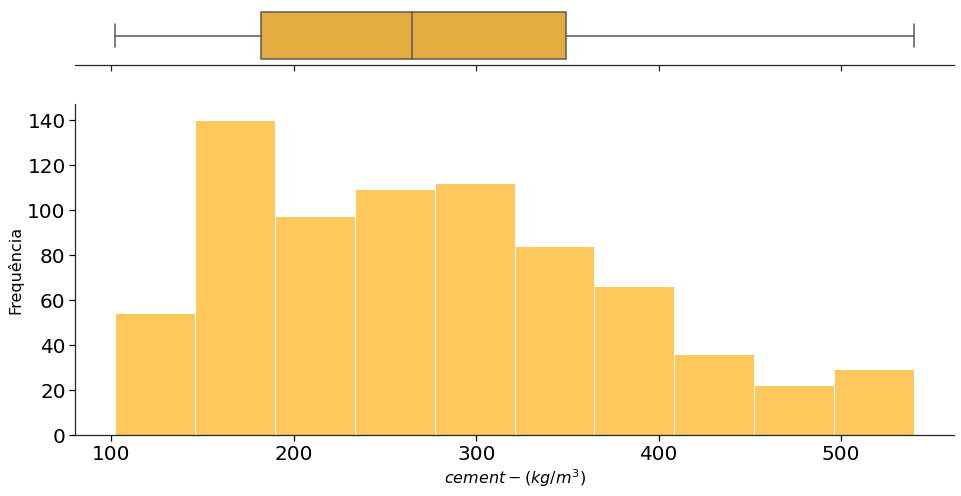

In [25]:
#Representação de histograma de frequência e boxplot da variável
#DADOS = RESULTS_TEST[0]['TOTAL RESULTS']
DADOS = DF_I
OPCOES_GRAFICAS = { 'NAME': 'CEMENT_HISTOGRAM',
                    'WIDTH': 0.40, 
                    'HEIGHT': 0.20,
                    'DPI': 600, 
                    'BINS' : 10,
                    'EXTENSION': '.svg',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$cement-(kg/m^3)$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',  
                    'CHART COLOR': '#FEB625',
                    'KDE': False}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'cement'}      
# CALL PLOT
rasd.RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


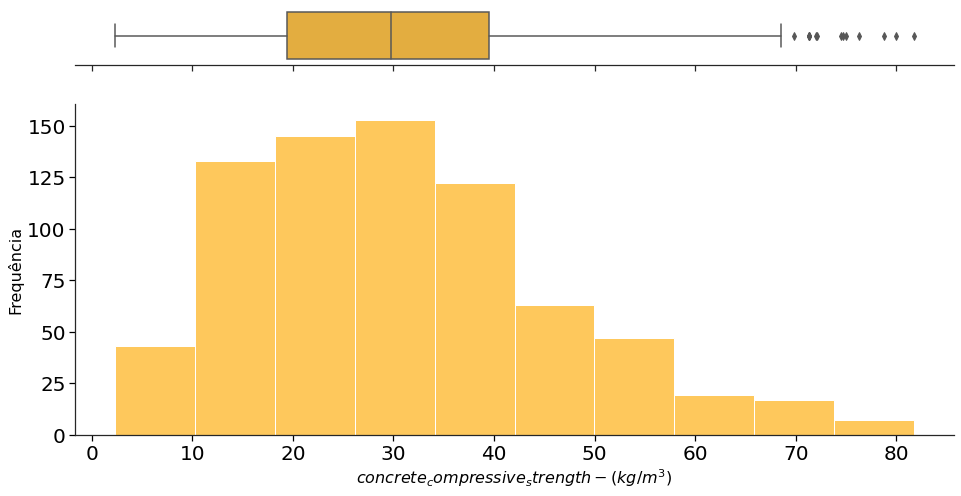

In [29]:
#Representação de histograma de frequência e boxplot da variável
#DADOS = RESULTS_TEST[0]['TOTAL RESULTS']
DADOS = DF_CONCRETO
OPCOES_GRAFICAS = { 'NAME': 'CEMENT_HISTOGRAM',
                    'WIDTH': 0.40, 
                    'HEIGHT': 0.20,
                    'DPI': 600, 
                    'BINS' : 10,
                    'EXTENSION': '.svg',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$concrete_compressive_strength-(kg/m^3)$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',  
                    'CHART COLOR': '#FEB625',
                    'KDE': False}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'concrete_compressive_strength'}      
# CALL PLOT
rasd.RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

# Plotagem Matriz de Correlação

In [30]:
import seaborn as sns

In [31]:
def SNS_HEATMAP(DATA, CONFIG):
    CORR = DATA.corr()
    sns.heatmap(CORR)

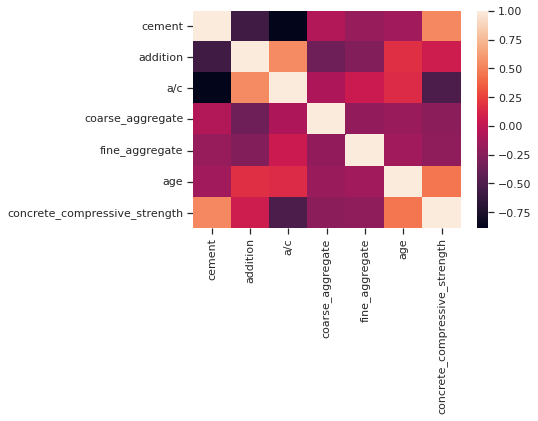

In [32]:
CONFIG = {
    
}
SNS_HEATMAP(DF_CONCRETO, CONFIG)

# Describe + Coeficiente de variação para o Excel

In [34]:
# pip install XlsxWriter

     |████████████████████████████████| 149 kB 13.1 MB/s 


In [35]:
import xlsxwriter

In [38]:
import numpy as np

In [36]:
def EXCEL_DATAFRAME_DESCRIPTION(DATAFRAME, OPTIONS):
    NAME = OPTIONS['PATH'] + '\\' + OPTIONS['NAME'] + '.xlsx'
    if OPTIONS['VARIATION_COEF']:
        VARIATIONS = [100 * DESV/MED for MED, DESV in np.transpose(DATAFRAME.values[1:3])]
        DATAFRAME.loc['cv'] = VARIATIONS
        
    EXCEL = xlsxwriter.Workbook(NAME)
    LABEL_FORMAT = EXCEL.add_format({'bold': True, 'border': True})
    EXCEL_SHEET = EXCEL.add_worksheet(OPTIONS['SHEET_NAME'])
    
    AUX_C = 1
    for COL in DATAFRAME.columns:
        EXCEL_SHEET.write(0, AUX_C, COL, LABEL_FORMAT)
        AUX_C += 1
        
    AUX_L = 1
    for LIN in OPTIONS['ROW_LABEL']:
        EXCEL_SHEET.write(AUX_L, 0, LIN, LABEL_FORMAT)
        AUX_L += 1
        
    VALUES = DATAFRAME.values.tolist()
    AUX_C, AUX_L = 0, 0
    for LIN in VALUES:
        AUX_L += 1
        for ELEM in LIN:
            AUX_C += 1
            EXCEL_SHEET.write(AUX_L, AUX_C , ELEM)
        AUX_C = 0

    EXCEL_SHEET.set_column(0, DATAFRAME.shape[0], 15)
    EXCEL.close()

In [39]:
NOMES_LINHAS = ['Quantidade de valores não nulos', 'Média dos valores', 'Desvio Padrão', 'Menor Valor', '25%', '50%', '75%', 'Maior Valor', 'Coeficiente de Variação']

OPCOES = {
    'NAME': 'Concrete_analysis',
    'PATH': 'data',
    'SHEET_NAME': 'initial',
    'ROW_LABEL': NOMES_LINHAS,
    'VARIATION_COEF': True
    
}
EXCEL_DATAFRAME_DESCRIPTION(DF_CONCRETO.describe(), OPCOES)

# Matriz de Correlação com barras

# Aplicar Z-Score

In [41]:
def NORMALIZAR(DATAFRAME):
    DF = DATAFRAME.copy()
    for COL in DF.columns:
        DF[COL] = (DF[COL] - DF[COL].mean())/DF[COL].std()
     
    return DF

In [42]:
DF_NORMAL = NORMALIZAR(DF_CONCRETO)

In [43]:
DF_NORMAL

,cement,addition,a/c,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,2.511839,-1.445753,-1.425600,0.859711,-1.287669,0.84661,3.213587
1,2.511839,-1.445753,-1.425600,1.044925,-1.287669,0.84661,2.025426
7,0.988985,-0.420960,-0.508585,-0.473832,-2.371339,0.84661,0.355437
8,-0.096049,-0.216001,0.277427,-0.473832,-1.366961,0.84661,0.972493
9,1.893180,-1.445753,-0.875391,-0.473832,-2.371339,0.84661,0.541866
...,...,...,...,...,...,...,...
1025,0.002937,0.779667,-0.356413,-1.238150,-0.067879,0.84661,0.869431
1026,0.438854,-0.198741,-0.483160,-1.882696,0.528140,0.84661,0.009492
1027,-1.214395,1.229497,1.623912,-0.962798,0.086742,0.84661,-0.481527
1028,-1.113506,0.568236,1.031108,0.237391,0.204360,0.84661,0.113866


# K-Fold

In [46]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
def K_FOLD(DATAFRAME, DIVISOES):
    x = DATAFRAME.drop(columns='concrete_compressive_strength')
    y = DATAFRAME['concrete_compressive_strength']

    model  = LinearRegression()
    kfold  = KFold(n_splits=DIVISOES, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
    result = cross_val_score(model, x, y, cv = kfold)

    return result

In [48]:
RESULTADO = K_FOLD(DF_NORMAL, 5)

print("K-Fold (R^2) Scores: {0}".format(RESULTADO))
print("Média R^2 para validação cruzada K-Fold: {0}".format(RESULTADO.mean()))

K-Fold (R^2) Scores: [0.78538942 0.72370833 0.76628861 0.82632014 0.80491717]
Média R^2 para validação cruzada K-Fold: 0.7813247342421985
